# N starvation 

## Which N sources allow HOT1A3 to grow

check out Escher visualization https://escher.readthedocs.io/en/latest/getting_started.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import cobra
import numpy as np
import seaborn as sns
import itertools
from matplotlib.colors import LogNorm, Normalize


In [2]:
import subprocess
import time


In [3]:
from cobra.flux_analysis import flux_variability_analysis
from cobra.flux_analysis import production_envelope


In [4]:
from cobra.flux_analysis import (
    single_gene_deletion, single_reaction_deletion, double_gene_deletion,
    double_reaction_deletion)

In [5]:
sns.hls_palette

<function seaborn.palettes.hls_palette(n_colors=6, h=0.01, l=0.6, s=0.65, as_cmap=False)>

In [6]:
def get_elements(rid):
    r = model.reactions.get_by_id(rid)
    m = r.reactants[0]    
    elements = m.elements.copy()
    
    res = {
        'reaction' : rid,
        'metabolite' : m.name,
        'mid' : m.id,
        'N' : 'N' in elements,
        'C' : 'C' in elements,
        
    }
    return pd.Series(res)

# Import model and manipulate based on Ofaim at el

In [7]:
import os
model_dpath = os.path.join('..', 'Models')
model_fname = 'HOT1A3_ncbi.xml'
model_fpath = os.path.join(model_dpath, model_fname)


In [8]:
model = cobra.io.read_sbml_model(model_fpath)

Set parameter Username
Academic license - for non-commercial use only - expires 2023-07-13


In [9]:
exchange_ids = [r.id for r in model.exchanges] # + ["R00024"]

In [10]:
print('reactions', len(model.reactions))
print('metabolites', len(model.metabolites))
print('genes', len(model.genes))

reactions 2341
metabolites 1546
genes 1025


In [11]:
model

Name,HOT1A3_ncbi
Memory address,0x07f1cebed1130
Number of metabolites,1546
Number of reactions,2341
Number of groups,0
Objective expression,1.0*Growth - 1.0*Growth_reverse_699ae
Compartments,"cytosol, periplasm, extracellular space"


In [12]:
cobra.Configuration()

Attribute,Description,Value
solver,Mathematical optimization solver,gurobi
tolerance,"General solver tolerance (feasibility, integrality, etc.)",1e-07
lower_bound,Default reaction lower bound,-1000.0
upper_bound,Default reaction upper bound,1000.0
processes,Number of parallel processes,11
cache_directory,Path for the model cache,/home/oweissberg/.cache/cobrapy
max_cache_size,Maximum cache size in bytes,104857600
cache_expiration,Model cache expiration time in seconds (if any),None


In [13]:
exchange_ids

['EX_12ppd__R_e',
 'EX_12ppd__S_e',
 'EX_14glucan_e',
 'EX_15dap_e',
 'EX_25dkglcn_e',
 'EX_2ameph_e',
 'EX_2m35mdntha_e',
 'EX_35dnta_e',
 'EX_3h4atb_e',
 'EX_3mb_e',
 'EX_4hba_e',
 'EX_4hbald_e',
 'EX_4hbz_e',
 'EX_5dglcn_e',
 'EX_5drib_e',
 'EX_6atha_e',
 'EX_LalaLglu_e',
 'EX_abg4_e',
 'EX_abt_e',
 'EX_ac_e',
 'EX_acac_e',
 'EX_acald_e',
 'EX_acgam_e',
 'EX_actn__R_e',
 'EX_ade_e',
 'EX_adn_e',
 'EX_ala_L_asp__L_e',
 'EX_ala_L_glu__L_e',
 'EX_ala_L_thr__L_e',
 'EX_ala__D_e',
 'EX_ala__L_e',
 'EX_ala_gln_e',
 'EX_ala_his_e',
 'EX_ala_leu_e',
 'EX_alagly_e',
 'EX_alahis_e',
 'EX_alaleu_e',
 'EX_alathr_e',
 'EX_alatrp_e',
 'EX_alltn_e',
 'EX_arab__L_e',
 'EX_arbt6p_e',
 'EX_arbt_e',
 'EX_arg__L_e',
 'EX_asn__L_e',
 'EX_aso3_e',
 'EX_aso4_e',
 'EX_asp__L_e',
 'EX_bhb_e',
 'EX_btn_e',
 'EX_but_e',
 'EX_bz_e',
 'EX_ca2_e',
 'EX_cell4_e',
 'EX_cellb_e',
 'EX_cgly_e',
 'EX_chol_e',
 'EX_cinnm_e',
 'EX_cit_e',
 'EX_cl_e',
 'EX_co2_e',
 'EX_co_e',
 'EX_cobalt2_e',
 'EX_crn_e',
 'EX_csn_e',
 

In [14]:
model.reactions.get_by_id('EX_cyan_e')

Reaction identifier,EX_cyan_e
Name,R_EX_cyan_e
Memory address,0x7f1cea2e7e80
Stoichiometry,cyan_e <=> Hydrogen cyanide <=>
GPR,
Lower bound,-1000.0
Upper bound,1000.0


In [15]:
model.reactions.get_by_id('Growth')

Reaction identifier,Growth
Name,Biomass reaction
Memory address,0x7f1cea1ed280
Stoichiometry,0.000223 10fthf_c + 0.513689 ala__L_c + 0.000223 amet_c + 0.295792 arg__L_c + 0.241055 asn__L_c + 0.241055 asp__L_c + 54.124831 atp_c + 0.005205 ca2_c + 0.005205 cl_c + 0.000576 coa_c + 0.0001... 0.000223 10-Formyltetrahydrofolate + 0.513689 L-Alanine + 0.000223 S-Adenosyl-L-methionine + 0.295792 L-Arginine + 0.241055 L-Asparagine + 0.241055 L-Aspartate + 54.124831 ATP C10H12N5O13P3 +...
GPR,
Lower bound,0.0
Upper bound,1000.0


# Identify N sources where MED4 grows on

In [16]:
len(model.medium)

238

In [17]:
len(exchange_ids)

238

In [18]:
# copied from MED4 model
pro99_mediums = ['Ammonia', 'Cadmium', 'Ca2+', 'Cl-', 'Cobalt ion', 'Copper',
       'Orthophosphate', 'H2O', 'HCO3-', 'H+', 'Fe2+', 'Photon',
       'Magnesium cation', 'Molybdenum', 'O2', 'K+', 'Selenate', 'Na+',
       'Strontium cation', 'Sulfate', 'Zn2+', 'Hydrogen peroxide']
print('\n'.join(pro99_mediums))

Ammonia
Cadmium
Ca2+
Cl-
Cobalt ion
Copper
Orthophosphate
H2O
HCO3-
H+
Fe2+
Photon
Magnesium cation
Molybdenum
O2
K+
Selenate
Na+
Strontium cation
Sulfate
Zn2+
Hydrogen peroxide


In [19]:
# what are the metabolites in the medium?
df_medium = pd.DataFrame({'mediumExchange' : model.medium.keys()})
df_medium = pd.DataFrame.from_records(df_medium.mediumExchange.apply(get_elements))


In [20]:
df_medium

,reaction,metabolite,mid,N,C
0,EX_12ppd__R_e,"(R)-Propane-1,2-diol",12ppd__R_e,False,True
1,EX_12ppd__S_e,"(S)-Propane-1,2-diol",12ppd__S_e,False,True
2,EX_14glucan_e,"1,4-alpha-D-glucan",14glucan_e,False,True
3,EX_15dap_e,"1,5-Diaminopentane",15dap_e,True,True
4,EX_25dkglcn_e,"2,5-diketo-D-gluconate",25dkglcn_e,False,True
...,...,...,...,...,...
233,EX_val__L_e,L-Valine,val__L_e,True,True
234,EX_xan_e,Xanthine,xan_e,True,True
235,EX_xtsn_e,Xanthosine,xtsn_e,True,True
236,EX_xyl__D_e,D-Xylose,xyl__D_e,False,True


In [21]:
pro99_df = pd.read_excel('HOT1A3_medium.xlsx')

In [22]:
pro99_df.head()

,reaction,metabolite,N,C,pro99,MED4 metabolite,promm
0,EX_actn__R_e,R Acetoin C4H8O2,False,True,NaN,NaN,NaN
1,EX_bhb_e,(R)-3-Hydroxybutanoate,False,True,NaN,NaN,NaN
2,EX_12ppd__R_e,"(R)-Propane-1,2-diol",False,True,NaN,NaN,NaN
3,EX_12ppd__S_e,"(S)-Propane-1,2-diol",False,True,NaN,NaN,NaN
4,EX_phedca_e,10 Phenyldecanoic acid,False,True,NaN,NaN,NaN


In [23]:
df_medium.loc[df_medium.metabolite.str.contains('ic')]

,reaction,metabolite,mid,N,C
8,EX_3h4atb_e,3 Hydroxy 4 acetylthiobutanoic acid,3h4atb_e,False,False
9,EX_3mb_e,3-Methylbutanoic acid,3mb_e,False,True
15,EX_6atha_e,6 acetylthiohexanoic acid,6atha_e,False,True
84,EX_fe3dcit_e,Fe(III)dicitrate,fe3dcit_e,False,True
85,EX_fe3pyovd_kt_e,Ferrypyoverdine P putida KT2440 specific,fe3pyovd_kt_e,True,True
154,EX_lnlc_e,Linoleic acid (all cis C18:2) n-6,lnlc_e,False,True
182,EX_phedca_e,10 Phenyldecanoic acid,phedca_e,False,True
183,EX_phehpa_e,7 Phenylheptanoic acid,phehpa_e,False,True
184,EX_phehxa_e,6 Phenylhexanoic acid,phehxa_e,False,True
186,EX_phenona_e,9 Phenylnonanoic acid,phenona_e,False,True


In [24]:
pro99_df.loc[~pro99_df.reaction.isin(exchange_ids)]

,reaction,metabolite,N,C,pro99,MED4 metabolite,promm
12,EX_4abut_e,4-Aminobutanoate,True,True,NaN,NaN,NaN
42,EX_btoh_e,Butanol,False,True,NaN,NaN,NaN
47,EX_chor_e,Chorismate,False,True,NaN,NaN,NaN
53,EX_alaala_e,D-Alanyl-D-alanine,True,True,NaN,NaN,NaN
70,EX_glcn_e,D-Gluconate,False,True,NaN,NaN,NaN
82,EX_ser__D_e,D-Serine,True,True,NaN,NaN,NaN
125,EX_id3acald_e,Indole 3 acetaldehyde C10H9NO,True,True,NaN,NaN,NaN
144,EX_metox_e,L Methionine S oxide C5H11NO3S,True,True,NaN,NaN,NaN
160,EX_his__L_e,L-Histidine,True,True,NaN,NaN,NaN
168,EX_phe__L_e,L-Phenylalanine,True,True,NaN,NaN,NaN


In [25]:
pro99_df.loc[~pro99_df.reaction.isin(exchange_ids), 'promm'] = np.NaN

In [26]:
promm_exchanges = pro99_df.loc[pro99_df.pro99.isin(['yes']) | pro99_df.promm.isin(['yes']), 'reaction']
pro99_exchanges = pro99_df.loc[pro99_df.pro99.isin(['yes']), 'reaction']
other_exchahges = [m for m in exchange_ids if m not in promm_exchanges]

In [27]:
#[m for m in exchange_ids if m not in pro99_df.reaction.values]
df_medium.loc[~df_medium.reaction.isin(pro99_df.reaction), ['reaction', 'metabolite']]

,reaction,metabolite
2,EX_14glucan_e,"1,4-alpha-D-glucan"
3,EX_15dap_e,"1,5-Diaminopentane"
53,EX_cell4_e,Cellulose (n=4 repeating units)
90,EX_fuc_e,L-fuculose
137,EX_hom__L_e,L-Homoserine
141,EX_ibt_e,Isobutyrate
167,EX_mnl1p_e,D-Mannitol 1-phosphate
170,EX_mththf_e,"(2R,4S)-2-methyl-2,3,3,4-tetrahydroxytetrahydr..."
201,EX_quin_e,Quinate
205,EX_salchs4_e,Salmochelin-S4


In [28]:
#[m for m in exchange_ids if m not in pro99_df.reaction.values]
pro99_df.loc[~pro99_df.reaction.isin(df_medium.reaction), ['reaction', 'metabolite']]

,reaction,metabolite
12,EX_4abut_e,4-Aminobutanoate
42,EX_btoh_e,Butanol
47,EX_chor_e,Chorismate
53,EX_alaala_e,D-Alanyl-D-alanine
70,EX_glcn_e,D-Gluconate
82,EX_ser__D_e,D-Serine
125,EX_id3acald_e,Indole 3 acetaldehyde C10H9NO
144,EX_metox_e,L Methionine S oxide C5H11NO3S
160,EX_his__L_e,L-Histidine
168,EX_phe__L_e,L-Phenylalanine


In [29]:
pro99_df.head()

,reaction,metabolite,N,C,pro99,MED4 metabolite,promm
0,EX_actn__R_e,R Acetoin C4H8O2,False,True,NaN,NaN,NaN
1,EX_bhb_e,(R)-3-Hydroxybutanoate,False,True,NaN,NaN,NaN
2,EX_12ppd__R_e,"(R)-Propane-1,2-diol",False,True,NaN,NaN,NaN
3,EX_12ppd__S_e,"(S)-Propane-1,2-diol",False,True,NaN,NaN,NaN
4,EX_phedca_e,10 Phenyldecanoic acid,False,True,NaN,NaN,NaN


In [30]:
pro99_df.columns

Index(['reaction', 'metabolite', 'N', 'C', 'pro99', 'MED4 metabolite',
       'promm'],
      dtype='object')

In [31]:
df_medium.head()

,reaction,metabolite,mid,N,C
0,EX_12ppd__R_e,"(R)-Propane-1,2-diol",12ppd__R_e,False,True
1,EX_12ppd__S_e,"(S)-Propane-1,2-diol",12ppd__S_e,False,True
2,EX_14glucan_e,"1,4-alpha-D-glucan",14glucan_e,False,True
3,EX_15dap_e,"1,5-Diaminopentane",15dap_e,True,True
4,EX_25dkglcn_e,"2,5-diketo-D-gluconate",25dkglcn_e,False,True


In [32]:
pd.merge(df_medium, pro99_df[['reaction', 'metabolite', 'pro99', 'MED4 metabolite',
       'promm']], on='reaction', how='left', suffixes=['', '_luca']).to_excel('HOT1A3_medium_NCBI.xlsx')

In [33]:
# does it grow on promm?
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in promm_exchanges:
        medium[m] = 1000.0
    model.medium = medium
    print ('model medium', model.medium)
    solution = model.optimize()
    print(model.summary())


model medium {'EX_ac_e': 1000.0, 'EX_btn_e': 1000.0, 'EX_ca2_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_glyc_e': 1000.0, 'EX_h2o2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 1000.0, 'EX_inost_e': 1000.0, 'EX_k_e': 1000.0, 'EX_lac__D_e': 1000.0, 'EX_lac__L_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_pyr_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_zn2_e': 1000.0}
Objective
1.0 Growth = 21.612060456817773

Uptake
------
Metabolite     Reaction     Flux  C-Number C-Flux
     ca2_e     EX_ca2_e   0.1125         0  0.00%
      cl_e      EX_cl_e   0.1125         0  0.00%
 cobalt2_e EX_cobalt2_e 0.002161         0  0.00%
     cu2_e     EX_cu2_e  0.01532         0  0.00%
     fe2_e     EX_fe2_e   0.3235         0  0.00%
    glyc_e    EX_glyc_e    764.8         3 61.97%
       h_e       EX_h_e    187.2         0  0.00%
  

In [34]:
# does it grow on pro99?
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in pro99_exchanges:
        medium[m] = 1000.0
    model.medium = medium
    print ('model medium', model.medium)
    solution = model.optimize()
    print(model.summary())


model medium {'EX_ca2_e': 1000.0, 'EX_cl_e': 1000.0, 'EX_co2_e': 1000.0, 'EX_cobalt2_e': 1000.0, 'EX_cu2_e': 1000.0, 'EX_fe2_e': 1000.0, 'EX_h2o2_e': 1000.0, 'EX_h2o_e': 1000.0, 'EX_h_e': 1000.0, 'EX_k_e': 1000.0, 'EX_mg2_e': 1000.0, 'EX_mn2_e': 1000.0, 'EX_mobd_e': 1000.0, 'EX_nh4_e': 1000.0, 'EX_o2_e': 1000.0, 'EX_pi_e': 1000.0, 'EX_sel_e': 1000.0, 'EX_so4_e': 1000.0, 'EX_zn2_e': 1000.0}
Objective
1.0 Growth = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



In [35]:
# try to add each exchange one by one
results = list()

def _check_medium(met1, met2=None):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        model.medium = medium
        solution = model.slim_optimize()
        return {'uptake' : met1, 'objective_value' : solution}
results = [_check_medium(met) for met in exchange_ids]        

In [36]:
df = pd.DataFrame(results)

In [37]:
df_growing = df.loc[(df.objective_value > 1e-5), 
                    ['uptake','objective_value']
                   ].nlargest(n=1000, columns='objective_value').reset_index(drop=True)

In [38]:
tdf = pd.DataFrame.from_records(df_growing.uptake.apply(get_elements))
df_growing = pd.merge(df_growing, tdf, left_on='uptake', right_on='reaction')

In [39]:
df_growing

,uptake,objective_value,reaction,metabolite,mid,N,C
0,EX_cytd_e,29.728192,EX_cytd_e,Cytidine,cytd_e,True,True
1,EX_gsn_e,27.314752,EX_gsn_e,Guanosine,gsn_e,True,True
2,EX_uri_e,25.055581,EX_uri_e,Uridine,uri_e,True,True
3,EX_adn_e,20.317783,EX_adn_e,Adenosine,adn_e,True,True
4,EX_ins_e,20.132444,EX_ins_e,Inosine,ins_e,True,True
...,...,...,...,...,...,...,...
57,EX_csn_e,8.318275,EX_csn_e,Cytosine,csn_e,True,True
58,EX_ura_e,8.318275,EX_ura_e,Uracil,ura_e,True,True
59,EX_xan_e,8.017724,EX_xan_e,Xanthine,xan_e,True,True
60,EX_alltn_e,7.093093,EX_alltn_e,Allantoin,alltn_e,True,True


In [40]:
# check that the media is correct

In [41]:
# try to add each pair of exchanges
results = list()
not_open_boundary_ids = [i for i in exchange_ids if (i not in pro99_exchanges) and (i not in df_growing.reaction.values)]

def _check_medium(met1, met2=None):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        if met2 is not None:
            medium[met2] = 1000.0
        model.medium = medium
        solution = model.slim_optimize()
        return {'uptake' : met1, 'uptake2' : met2, 'objective_value' : solution}
results = [_check_medium(met1, met2) for met1, met2 in itertools.combinations(not_open_boundary_ids, 2)]        

In [42]:
df = pd.DataFrame(results)

In [43]:
df.head()

,uptake,uptake2,objective_value
0,EX_12ppd__R_e,EX_12ppd__S_e,0.0
1,EX_12ppd__R_e,EX_14glucan_e,0.0
2,EX_12ppd__R_e,EX_15dap_e,0.0
3,EX_12ppd__R_e,EX_25dkglcn_e,0.0
4,EX_12ppd__R_e,EX_2m35mdntha_e,0.0


In [44]:
df_growing2 = df.loc[(df.objective_value > 1e-5), 
                    ['uptake','uptake2', 'objective_value']
                   ].nlargest(n=1000, columns='objective_value').reset_index(drop=True)

In [45]:
df_growing2

,uptake,uptake2,objective_value
0,EX_14glucan_e,EX_nh4_e,30.429427
1,EX_14glucan_e,EX_urea_e,29.906104
2,EX_14glucan_e,EX_no2_e,29.276563
3,EX_lcts_e,EX_nh4_e,29.092801
4,EX_cellb_e,EX_nh4_e,28.726116
...,...,...,...
346,EX_co_e,EX_nh4_e,1.689987
347,EX_co_e,EX_no2_e,1.484364
348,EX_co_e,EX_no3_e,1.404266
349,EX_co_e,EX_tnt_e,1.293804


In [46]:
len(set(df_growing2.uptake.unique()) | set(df_growing2.uptake2.unique()))

76

In [47]:
(set(df_growing2.uptake.unique()) | set(df_growing2.uptake2.unique())) & set(df_growing.uptake.unique())

set()

In [48]:
df_growing2[['reaction', 'metabolite','mid','N','C']] = df_growing2.uptake.apply(get_elements)
df_growing2[['reaction2', 'metabolite2','mid2','N2','C2']] = df_growing2.uptake2.apply(get_elements)

#df_growing = pd.merge(df_growing, tdf, left_on='uptake', right_on='reaction')

In [49]:
df_growing2

,uptake,uptake2,objective_value,reaction,metabolite,mid,N,C,reaction2,metabolite2,mid2,N2,C2
0,EX_14glucan_e,EX_nh4_e,30.429427,EX_14glucan_e,"1,4-alpha-D-glucan",14glucan_e,False,True,EX_nh4_e,Ammonium,nh4_e,True,False
1,EX_14glucan_e,EX_urea_e,29.906104,EX_14glucan_e,"1,4-alpha-D-glucan",14glucan_e,False,True,EX_urea_e,Urea CH4N2O,urea_e,True,True
2,EX_14glucan_e,EX_no2_e,29.276563,EX_14glucan_e,"1,4-alpha-D-glucan",14glucan_e,False,True,EX_no2_e,Nitrite,no2_e,True,False
3,EX_lcts_e,EX_nh4_e,29.092801,EX_lcts_e,Lactose C12H22O11,lcts_e,False,True,EX_nh4_e,Ammonium,nh4_e,True,False
4,EX_cellb_e,EX_nh4_e,28.726116,EX_cellb_e,Cellobiose,cellb_e,False,True,EX_nh4_e,Ammonium,nh4_e,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,EX_co_e,EX_nh4_e,1.689987,EX_co_e,Carbon monoxide,co_e,False,True,EX_nh4_e,Ammonium,nh4_e,True,False
347,EX_co_e,EX_no2_e,1.484364,EX_co_e,Carbon monoxide,co_e,False,True,EX_no2_e,Nitrite,no2_e,True,False
348,EX_co_e,EX_no3_e,1.404266,EX_co_e,Carbon monoxide,co_e,False,True,EX_no3_e,Nitrate,no3_e,True,False
349,EX_co_e,EX_tnt_e,1.293804,EX_co_e,Carbon monoxide,co_e,False,True,EX_tnt_e,2 4 6 Trinitrotoluene,tnt_e,True,False


### N sources that HOT1A3 can grow on 

In [50]:
df_growing

,uptake,objective_value,reaction,metabolite,mid,N,C
0,EX_cytd_e,29.728192,EX_cytd_e,Cytidine,cytd_e,True,True
1,EX_gsn_e,27.314752,EX_gsn_e,Guanosine,gsn_e,True,True
2,EX_uri_e,25.055581,EX_uri_e,Uridine,uri_e,True,True
3,EX_adn_e,20.317783,EX_adn_e,Adenosine,adn_e,True,True
4,EX_ins_e,20.132444,EX_ins_e,Inosine,ins_e,True,True
...,...,...,...,...,...,...,...
57,EX_csn_e,8.318275,EX_csn_e,Cytosine,csn_e,True,True
58,EX_ura_e,8.318275,EX_ura_e,Uracil,ura_e,True,True
59,EX_xan_e,8.017724,EX_xan_e,Xanthine,xan_e,True,True
60,EX_alltn_e,7.093093,EX_alltn_e,Allantoin,alltn_e,True,True


### when all other potential mediums are available, HOT1A3 can grow on a combination of metabolites

- there is a list of 77 metabolites that enable growth when added to pro99. there are additional 174 metabolites that when all are available, it grows. for now do not pursue this list

In [51]:
# open all additional mediums (all those that do not facilitate growth by themselves)
not_open_boundary_ids = [i for i in exchange_ids if (i not in pro99_exchanges) and 
                         (i not in df_growing.reaction.values) and
                         (i not in df_growing2.reaction.values) and
                         (i not in df_growing2.reaction2.values)
                        ]
with model:
    medium = model.medium
    for m in medium:
        medium[m] = 0.0
    for m in pro99_exchanges:
        medium[m] = 1000.0
    medium["EX_nh4_e"] = 0.0
    for i in not_open_boundary_ids:
        medium[i] = 1000.0
    model.medium = medium
    solution = model.optimize()
    print(model.summary())


Objective
1.0 Growth = 0.0

Uptake
------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []

Secretion
---------
Empty DataFrame
Columns: [Metabolite, Reaction, Flux, C-Number, C-Flux]
Index: []



In [52]:
len(not_open_boundary_ids), len(exchange_ids), len(pro99_exchanges), len(df_growing.reaction)

(100, 238, 19, 62)

In [53]:
len(set(df_growing2.reaction) |set(df_growing2.reaction2))

76

In [54]:
251-19-77

155

### Force HOT1A3 to uptake the potential N/C sources, limit growth (biomass), and see what is secreted

In [55]:
def _force_feeding(met1):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        model.medium = medium
        model.reactions.get_by_id(met1).upper_bound = -1e-5
        model.reactions.Growth.upper_bound = 1e-2
        solution = model.slim_optimize()
        #print(met1, model.summary())
        print(met1)
        fluxes = flux_variability_analysis(model, model.boundary, loopless=True, fraction_of_optimum=0.9, processes=11)
        fluxes['uptake'] = met1
        return fluxes
fluxes_df_list = [_force_feeding(met1) for met1 in df_growing['uptake']]

EX_cytd_e
EX_gsn_e
EX_uri_e
EX_adn_e
EX_ins_e
EX_xtsn_e
EX_pro__L_e
EX_glu__L_e
EX_gln__L_e
EX_hishis_e
EX_ala_gln_e
EX_gthrd_e
EX_serglugly_e
EX_ala__L_e
EX_ala__D_e
EX_alahis_e
EX_ala_his_e
EX_glyglygln_e
EX_asp__L_e
EX_asn__L_e
EX_LalaLglu_e
EX_ala_L_glu__L_e
EX_glygln_e
EX_gly_gln_e
EX_progly_e
EX_gly_pro__L_e
EX_lysglugly_e
EX_hisgly_e
EX_gly_glu__L_e
EX_glyglu_e
EX_gly_e
EX_glyb_e
EX_alathr_e
EX_ala_L_thr__L_e
EX_chol_e
EX_g3ps_e
EX_glyphe_e
EX_gly_phe_e
EX_gly_tyr_e
EX_ala_L_asp__L_e
EX_g3pc_e
EX_ile__L_e
EX_gly_asn__L_e
EX_gly_asp__L_e
EX_ade_e
EX_gly_cys_e
EX_cgly_e
EX_glyser_e
EX_alagly_e
EX_hxan_e
EX_arg__L_e
EX_glygly_e
EX_alatrp_e
EX_cys__L_e
EX_crn_e
EX_ptrc_e
EX_gua_e
EX_csn_e
EX_ura_e
EX_xan_e
EX_alltn_e
EX_2ameph_e


In [72]:
def _force_feeding2(met1, met2):
    with model:
        medium = model.medium
        for m in medium:
            medium[m] = 0.0
        for m in pro99_exchanges:
            medium[m] = 1000.0
        medium["EX_nh4_e"] = 0.0
        medium[met1] = 1000.0
        medium[met2] = 1000.0
        model.medium = medium
        model.reactions.get_by_id(met1).upper_bound = -1e-5
        model.reactions.get_by_id(met2).upper_bound = -1e-5
        model.reactions.Growth.upper_bound = 1e-2
        solution = model.slim_optimize()
        #print(met1, model.summary())
        print(met1, met2)
        fluxes = flux_variability_analysis(model, model.boundary, loopless=True, fraction_of_optimum=0.9, processes=11)
        fluxes['uptake'] = met1
        fluxes['uptake2'] = met2
        return fluxes
fluxes2_df_list = [_force_feeding2(met1, met2) for met1, met2 in zip(df_growing2['uptake'], df_growing2['uptake2'])]

EX_14glucan_e EX_nh4_e
EX_14glucan_e EX_urea_e
EX_14glucan_e EX_no2_e
EX_lcts_e EX_nh4_e
EX_cellb_e EX_nh4_e
EX_nh4_e EX_tre_e
EX_nh4_e EX_raffin_e
EX_nh4_e EX_sucr_e
EX_melib_e EX_nh4_e
EX_fru_e EX_nh4_e
EX_tre_e EX_urea_e
EX_cellb_e EX_urea_e
EX_lcts_e EX_urea_e
EX_raffin_e EX_urea_e
EX_sucr_e EX_urea_e
EX_melib_e EX_urea_e
EX_no2_e EX_tre_e
EX_cellb_e EX_no2_e
EX_lcts_e EX_no2_e
EX_no2_e EX_raffin_e
EX_glc__D_e EX_urea_e
EX_fru_e EX_urea_e
EX_man_e EX_urea_e
EX_no2_e EX_sucr_e
EX_melib_e EX_no2_e
EX_gal_e EX_urea_e
EX_glyald_e EX_urea_e
EX_glc__D_e EX_nh4_e
EX_man_e EX_nh4_e
EX_gal_e EX_nh4_e
EX_fuc_e EX_nh4_e
EX_sbt__D_e EX_urea_e
EX_man_e EX_no2_e
EX_glc__D_e EX_no2_e
EX_fru_e EX_no2_e
EX_glyald_e EX_nh4_e
EX_14glucan_e EX_tnt_e
EX_galt_e EX_urea_e
EX_14glucan_e EX_no3_e
EX_gal_e EX_no2_e
EX_glyald_e EX_no2_e
EX_cellb_e EX_tnt_e
EX_sucr_e EX_tnt_e
EX_tnt_e EX_tre_e
EX_raffin_e EX_tnt_e
EX_no3_e EX_tre_e
EX_cellb_e EX_no3_e
EX_melib_e EX_tnt_e
EX_lcts_e EX_tnt_e
EX_fuc_e EX_urea_e


In [73]:
force_feeding_df = pd.concat(fluxes_df_list)

In [74]:
force_feeding2_df = pd.concat(fluxes2_df_list)

In [75]:
force_feeding_df.index = force_feeding_df.index.set_names(['secretion'])
force_feeding_df = force_feeding_df.reset_index()
force_feeding_df.head()

,secretion,minimum,maximum,uptake
0,sink_2ohph_c,0.0,66.658088,EX_cytd_e
1,sink_4crsol_c,0.0,279.476226,EX_cytd_e
2,sink_amob_c,0.0,0.000000,EX_cytd_e
3,sink_hemeO_c,0.0,65.829168,EX_cytd_e
4,sink_mobd_c,0.0,1000.000000,EX_cytd_e


In [76]:
force_feeding2_df.index = force_feeding2_df.index.set_names(['secretion'])
force_feeding2_df = force_feeding2_df.reset_index()
force_feeding2_df.head()

,secretion,minimum,maximum,uptake,uptake2
0,sink_2ohph_c,0.0,68.865655,EX_14glucan_e,EX_nh4_e
1,sink_4crsol_c,0.0,308.174253,EX_14glucan_e,EX_nh4_e
2,sink_amob_c,0.0,0.000000,EX_14glucan_e,EX_nh4_e
3,sink_hemeO_c,0.0,59.932463,EX_14glucan_e,EX_nh4_e
4,sink_mobd_c,0.0,1000.000000,EX_14glucan_e,EX_nh4_e


In [77]:
force_feeding_df.loc[force_feeding_df.maximum > 1e-3].groupby('secretion').minimum.count()

secretion
EX_12ppd__S_e    62
EX_15dap_e       62
EX_4hba_e        62
EX_4hbald_e      62
EX_4hbz_e        62
EX_5drib_e       62
EX_acald_e       62
EX_bz_e          62
EX_cell4_e       62
EX_cellb_e       62
EX_co2_e         62
EX_etha_e        62
EX_etoh_e        62
EX_fald_e         4
EX_fe3_e         62
EX_for_e         62
EX_glc__D_e      62
EX_glyald_e      62
EX_glyb_e         3
EX_glyc_e        62
EX_gua_e         61
EX_h2o_e         62
EX_h2s_e         62
EX_h_e           62
EX_hom__L_e      62
EX_ind3ac_e      62
EX_indole_e      62
EX_inost_e       62
EX_lys__L_e      62
EX_meoh_e         4
EX_mththf_e      62
EX_nh4_e         62
EX_o2_e          62
EX_oxa_e         62
EX_pea_e         62
EX_pi_e           3
EX_ptrc_e        61
EX_rib__D_e      62
EX_s_e           62
EX_slnt_e        62
EX_spmd_e        62
EX_thym_e         2
EX_ura_e          3
EX_urea_e        62
EX_val__L_e      62
sink_2ohph_c     62
sink_4crsol_c    62
sink_hemeO_c     62
sink_mobd_c      62
Name: mini

In [78]:
force_feeding2_df.loc[force_feeding2_df.maximum > 1e-3].groupby('secretion').minimum.count()

secretion
EX_12ppd__S_e      346
EX_15dap_e         351
EX_2m35mdntha_e     70
EX_35dnta_e         70
EX_3h4atb_e          5
EX_4hba_e          346
EX_4hbald_e        351
EX_4hbz_e          351
EX_5drib_e         351
EX_acald_e         346
EX_bz_e            351
EX_cell4_e         351
EX_cellb_e         346
EX_cinnm_e          15
EX_co2_e           347
EX_etha_e          351
EX_etoh_e          346
EX_fald_e            5
EX_fe2_e             5
EX_fe3_e           351
EX_for_e           346
EX_gal_e             5
EX_glc__D_e        346
EX_glyald_e        346
EX_glyc_e          346
EX_gua_e           351
EX_h2o_e           351
EX_h2s_e           350
EX_h_e             350
EX_hom__L_e        351
EX_ind3ac_e        351
EX_indole_e        351
EX_inost_e         351
EX_lys__L_e        351
EX_mththf_e        351
EX_nh4_e           281
EX_no2_e           140
EX_o2_e            351
EX_oxa_e           351
EX_pea_e           351
EX_pi_e              5
EX_ptrc_e          351
EX_rib__D_e        346
E

In [79]:
drop_columns = ['EX_co2_e',  'EX_fe3_e','EX_h2o_e',
       'EX_h_e', 'EX_o2_e',]

n_exchange_df = force_feeding_df.loc[(force_feeding_df.maximum > 1e-3) & (~force_feeding_df.secretion.isin(drop_columns))]
pdf = n_exchange_df.pivot_table(columns='uptake', index='secretion', values='maximum', fill_value=0)


In [80]:
drop_columns = ['EX_co2_e',  'EX_fe3_e','EX_h2o_e',
       'EX_h_e', 'EX_o2_e',]

n_exchange2_df = force_feeding2_df.loc[(force_feeding2_df.maximum > 1e-3) & (~force_feeding2_df.secretion.isin(drop_columns))]
#pdf2 = n_exchange2_df.pivot_table(columns='uptake', index='secretion', values='maximum', fill_value=0)


In [81]:
tdf = n_exchange_df.uptake.apply(get_elements)
n_exchange_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid', 'N', 'C']]

tdf = n_exchange_df.secretion.apply(get_elements)
n_exchange_df[['metabolite_secretion', 'mid_secretion', 'N_secretion', 'C_secretion']] = tdf[['metabolite','mid', 'N', 'C']]

n_exchange_df.head()

/tmp/ipykernel_17677/1387227966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_exchange_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid', 'N', 'C']]
/tmp/ipykernel_17677/1387227966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_exchange_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid', 'N', 'C']]
/tmp/ipykernel_17677/1387227966.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,secretion,minimum,maximum,uptake,metabolite_uptake,mid_uptake,N_uptake,C_uptake,metabolite_secretion,mid_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.0,66.658088,EX_cytd_e,Cytidine,cytd_e,True,True,2-Octaprenyl-6-hydroxyphenol,2ohph_c,False,True
1,sink_4crsol_c,0.0,279.476226,EX_cytd_e,Cytidine,cytd_e,True,True,P-Cresol,4crsol_c,False,True
3,sink_hemeO_c,0.0,65.829168,EX_cytd_e,Cytidine,cytd_e,True,True,Heme O C49H56FeN4O5,hemeO_c,True,True
4,sink_mobd_c,0.0,1000.000000,EX_cytd_e,Cytidine,cytd_e,True,True,Molybdate,mobd_c,False,False
6,EX_12ppd__S_e,0.0,1000.000000,EX_cytd_e,Cytidine,cytd_e,True,True,"(S)-Propane-1,2-diol",12ppd__S_e,False,True


In [82]:
tdf = n_exchange2_df.uptake.apply(get_elements)
n_exchange2_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid','N', 'C']]

tdf = n_exchange2_df.uptake2.apply(get_elements)
n_exchange2_df[['metabolite_uptake2', 'mid_uptake2', 'N_uptake2', 'C_uptake2']] = tdf[['metabolite', 'mid','N', 'C']]

tdf = n_exchange2_df.secretion.apply(get_elements)
n_exchange2_df[['metabolite_secretion', 'mid_secretion','N_secretion', 'C_secretion']] = tdf[['metabolite','mid', 'N', 'C']]

n_exchange2_df.head()

/tmp/ipykernel_17677/3224610242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_exchange2_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid','N', 'C']]
/tmp/ipykernel_17677/3224610242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  n_exchange2_df[['metabolite_uptake', 'mid_uptake', 'N_uptake', 'C_uptake']] = tdf[['metabolite', 'mid','N', 'C']]
/tmp/ipykernel_17677/3224610242.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,secretion,minimum,maximum,uptake,uptake2,metabolite_uptake,mid_uptake,N_uptake,C_uptake,metabolite_uptake2,mid_uptake2,N_uptake2,C_uptake2,metabolite_secretion,mid_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.0,68.865655,EX_14glucan_e,EX_nh4_e,"1,4-alpha-D-glucan",14glucan_e,False,True,Ammonium,nh4_e,True,False,2-Octaprenyl-6-hydroxyphenol,2ohph_c,False,True
1,sink_4crsol_c,0.0,308.174253,EX_14glucan_e,EX_nh4_e,"1,4-alpha-D-glucan",14glucan_e,False,True,Ammonium,nh4_e,True,False,P-Cresol,4crsol_c,False,True
3,sink_hemeO_c,0.0,59.932463,EX_14glucan_e,EX_nh4_e,"1,4-alpha-D-glucan",14glucan_e,False,True,Ammonium,nh4_e,True,False,Heme O C49H56FeN4O5,hemeO_c,True,True
4,sink_mobd_c,0.0,1000.000000,EX_14glucan_e,EX_nh4_e,"1,4-alpha-D-glucan",14glucan_e,False,True,Ammonium,nh4_e,True,False,Molybdate,mobd_c,False,False
6,EX_12ppd__S_e,0.0,1000.000000,EX_14glucan_e,EX_nh4_e,"1,4-alpha-D-glucan",14glucan_e,False,True,Ammonium,nh4_e,True,False,"(S)-Propane-1,2-diol",12ppd__S_e,False,True


In [83]:
col_anno = pd.DataFrame.from_records([get_elements(i) for i in pdf.columns])
row_anno = pd.DataFrame.from_records([get_elements(i) for i in pdf.index])
N_lut = {True: '#BF9270', False : '#FFEDDB'}
C_lut = {True: '#94B49F', False : '#FCF8E8'}
row_anno.N = row_anno.N.map(N_lut)
row_anno.C = row_anno.C.map(C_lut)
col_anno.N = col_anno.N.map(N_lut)
col_anno.C = col_anno.C.map(C_lut)
row_anno.index = row_anno.reaction
col_anno.index = col_anno.reaction

Text(0.5, 1, "Maximum FVA Flux - secretion when 'force fed'")

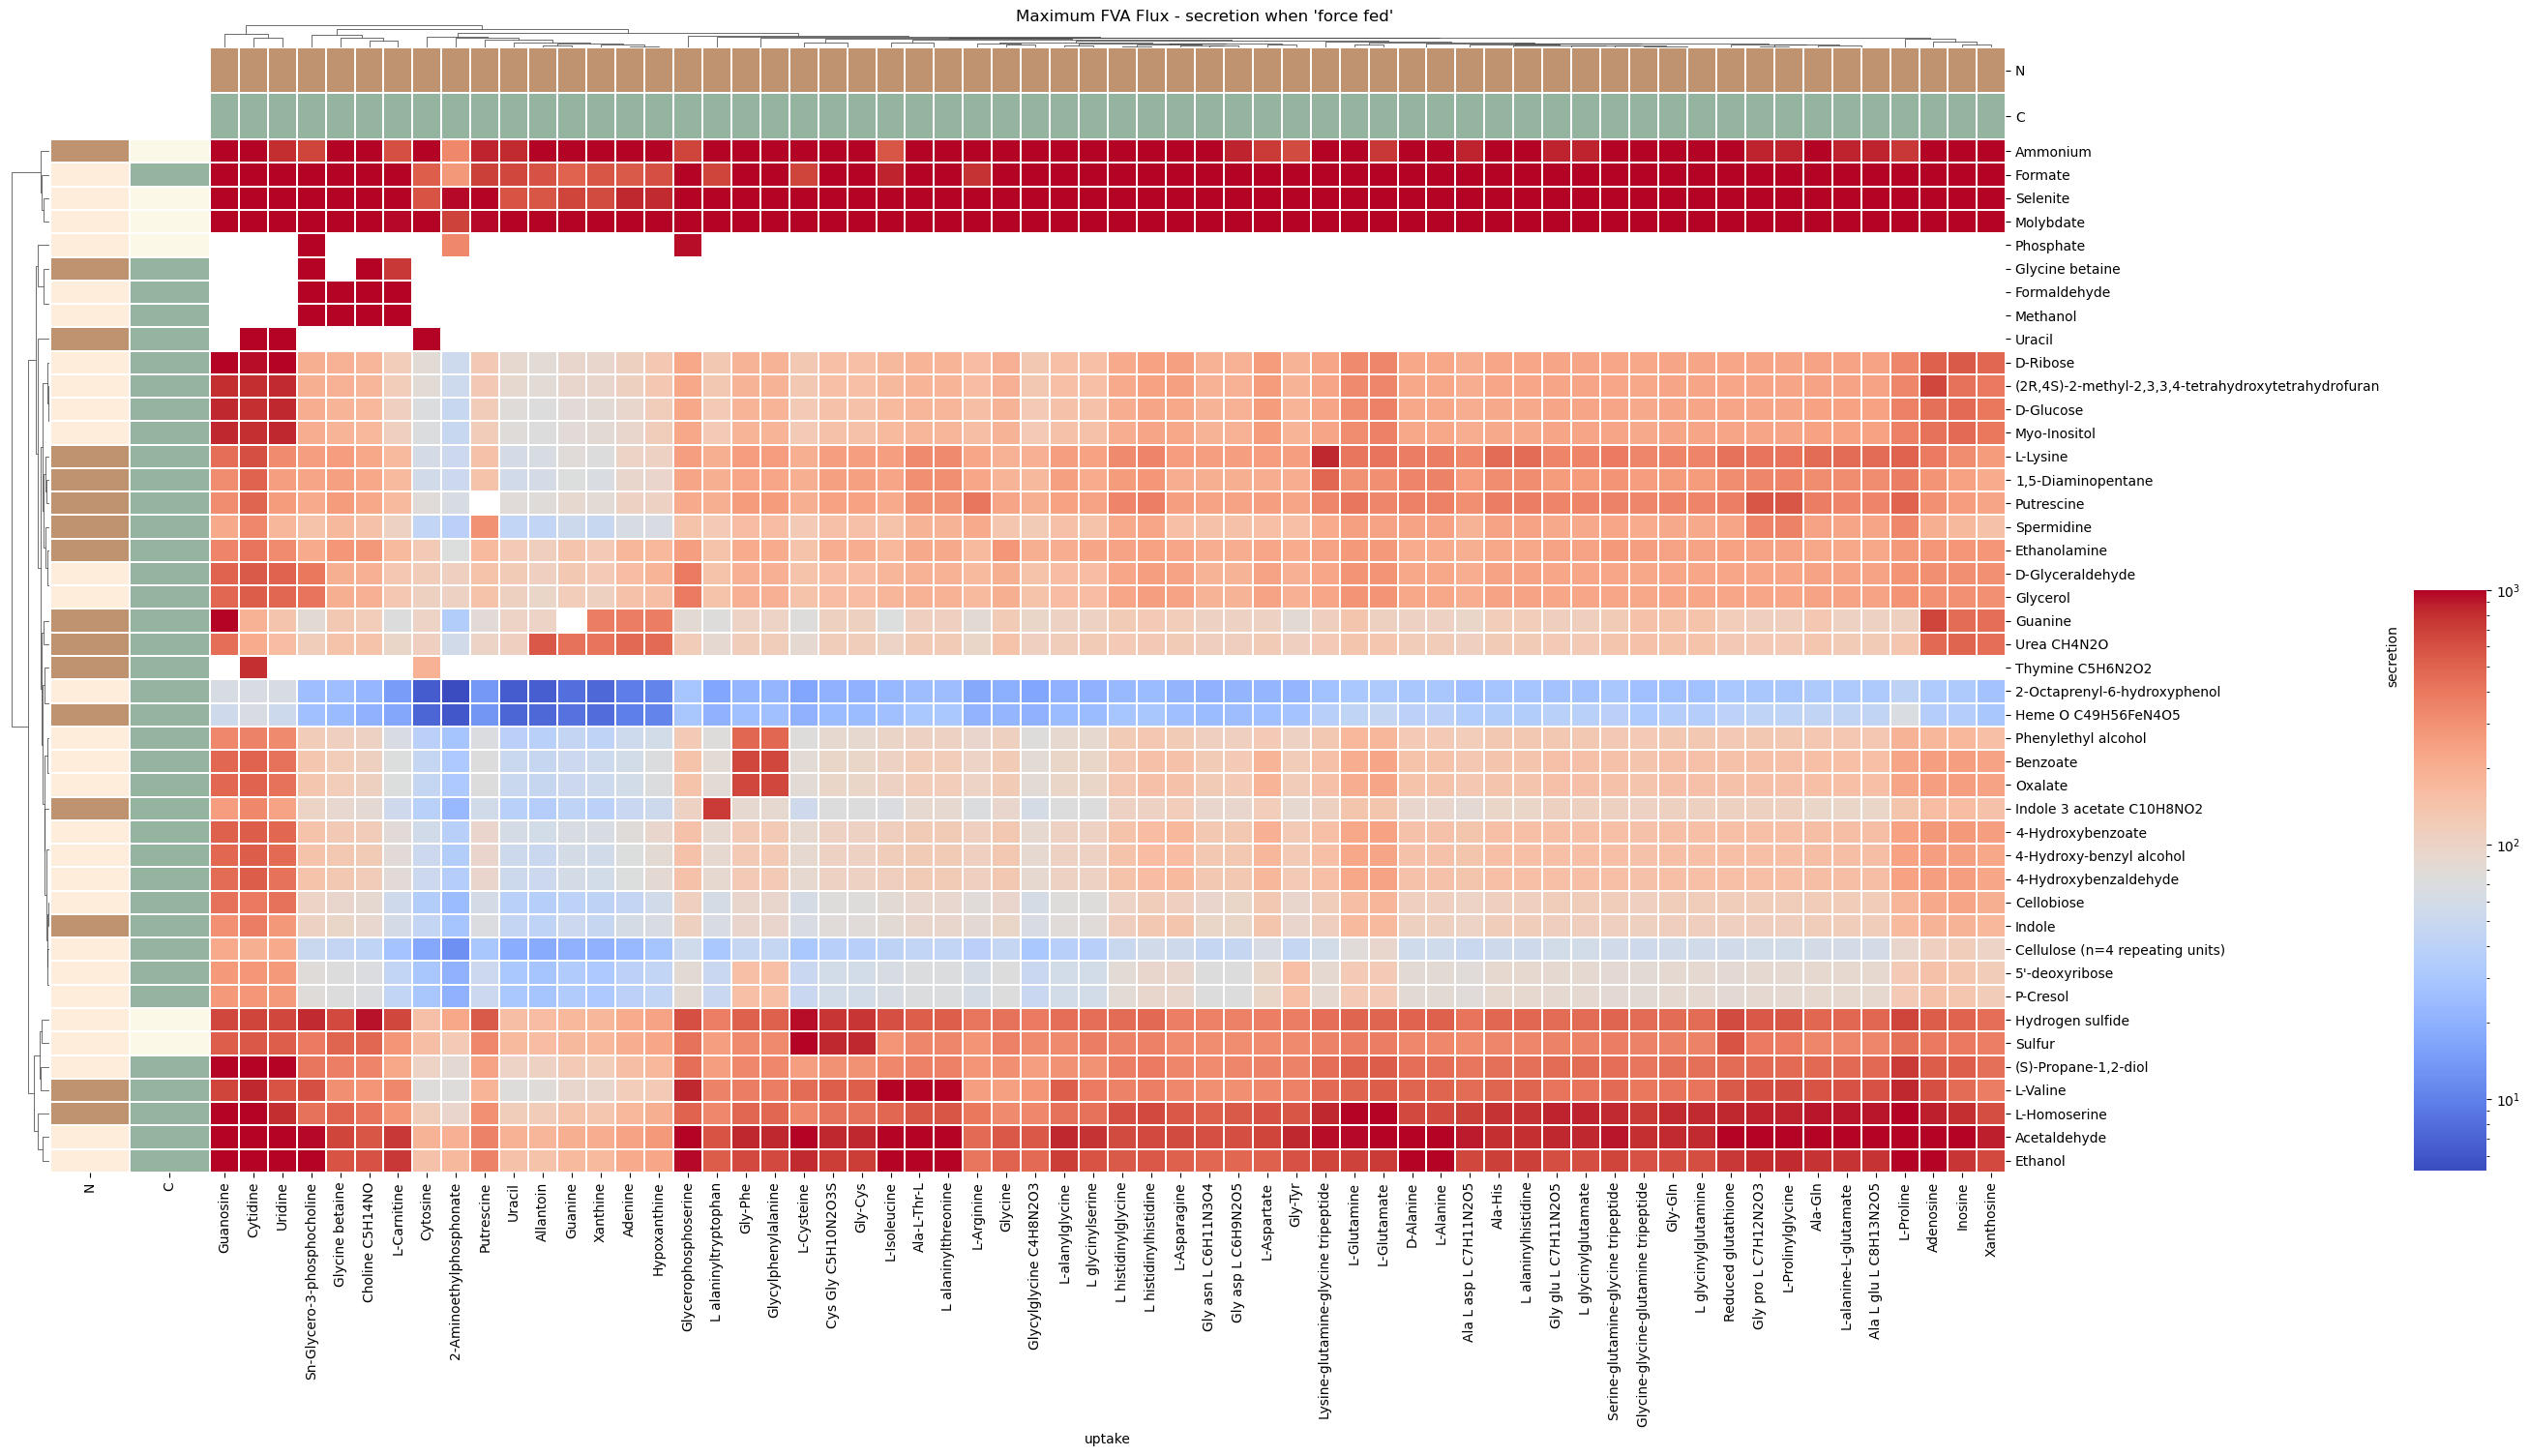

In [84]:

sns.clustermap(pdf, norm=LogNorm(), 
               cmap='coolwarm', figsize=(25,15), 
               linewidths=0.1, #cbar_kws= dict(location='right'),
               row_colors=row_anno[['N', 'C']],
               col_colors=col_anno[['N', 'C']],
               yticklabels= row_anno.metabolite,
               xticklabels= col_anno.metabolite,
               colors_ratio=0.04,
              robust=True, cbar_pos=(1, .2, .03, .4),
              dendrogram_ratio=0.02)
plt.suptitle("Maximum FVA Flux - secretion when 'force fed'", y=1)

In [85]:
pdf.shape

(44, 62)

In [86]:
len(exchange_ids)

238

In [89]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('ALT_N_sources.xlsx', engine='xlsxwriter')

# Write each dataframe to a different worksheet.
df_growing.to_excel(writer, sheet_name='uptake')
df_growing2.to_excel(writer, sheet_name='uptake2')
n_exchange_df.to_excel(writer, sheet_name='secretion')
n_exchange2_df.to_excel(writer, sheet_name='secretion2')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [90]:
n_exchange_df.shape,n_exchange2_df.shape

((2373, 12), (13466, 17))

In [91]:
n_exchange_df.head(50)

,secretion,minimum,maximum,uptake,metabolite_uptake,mid_uptake,N_uptake,C_uptake,metabolite_secretion,mid_secretion,N_secretion,C_secretion
0,sink_2ohph_c,0.000000e+00,66.658088,EX_cytd_e,Cytidine,cytd_e,True,True,2-Octaprenyl-6-hydroxyphenol,2ohph_c,False,True
1,sink_4crsol_c,0.000000e+00,279.476226,EX_cytd_e,Cytidine,cytd_e,True,True,P-Cresol,4crsol_c,False,True
3,sink_hemeO_c,0.000000e+00,65.829168,EX_cytd_e,Cytidine,cytd_e,True,True,Heme O C49H56FeN4O5,hemeO_c,True,True
4,sink_mobd_c,0.000000e+00,1000.000000,EX_cytd_e,Cytidine,cytd_e,True,True,Molybdate,mobd_c,False,False
6,EX_12ppd__S_e,0.000000e+00,1000.000000,EX_cytd_e,Cytidine,cytd_e,True,True,"(S)-Propane-1,2-diol",12ppd__S_e,False,True
8,EX_15dap_e,0.000000e+00,498.883681,EX_cytd_e,Cytidine,cytd_e,True,True,"1,5-Diaminopentane",15dap_e,True,True
15,EX_4hba_e,0.000000e+00,536.496708,EX_cytd_e,Cytidine,cytd_e,True,True,4-Hydroxy-benzyl alcohol,4hba_e,False,True
16,EX_4hbald_e,0.000000e+00,533.245998,EX_cytd_e,Cytidine,cytd_e,True,True,4-Hydroxybenzaldehyde,4hbald_e,False,True
17,EX_4hbz_e,0.000000e+00,533.245998,EX_cytd_e,Cytidine,cytd_e,True,True,4-Hydroxybenzoate,4hbz_e,False,True
19,EX_5drib_e,0.000000e+00,279.476229,EX_cytd_e,Cytidine,cytd_e,True,True,5'-deoxyribose,5drib_e,False,True


In [92]:
model.genes[30]

Gene identifier,WP_014976831_1
Name,G_WP_014976831_1
Memory address,0x7f1ceb94bc10
Functional,True
In 1 reaction(s),5DKGR
